#Gold & Silver Price prediction using Arima

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 11.8 MB/s 
     |████████████████████████████████| 9.5 MB 37.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('Gold.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-08,1247.599976,1264.000000,1247.300049,1259.800049,1259.800049,406.0
1,2016-06-09,1262.500000,1271.400024,1258.099976,1270.199951,1270.199951,381.0
2,2016-06-10,1267.599976,1278.000000,1265.300049,1273.400024,1273.400024,397.0
3,2016-06-13,1276.199951,1287.300049,1273.000000,1284.400024,1284.400024,328.0
4,2016-06-14,1281.800049,1289.699951,1277.800049,1285.599976,1285.599976,554.0
...,...,...,...,...,...,...,...
1251,2021-06-01,1905.099976,1916.199951,1892.800049,1902.900024,1902.900024,640.0
1252,2021-06-02,1899.199951,1908.800049,1896.000000,1907.500000,1907.500000,1267.0
1253,2021-06-03,1908.800049,1908.800049,1865.000000,1871.199951,1871.199951,1021.0
1254,2021-06-04,1869.300049,1895.500000,1854.000000,1889.800049,1889.800049,367.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1256 non-null   object 
 1   Open       1245 non-null   float64
 2   High       1245 non-null   float64
 3   Low        1245 non-null   float64
 4   Close      1245 non-null   float64
 5   Adj Close  1245 non-null   float64
 6   Volume     1245 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,1439.400803,1445.912853,1432.787551,1439.404258,1439.404258,5996.042570
std,238.427960,241.319068,235.573869,238.577917,238.577917,33670.810164
min,1126.900024,1132.800049,1123.900024,1127.800049,1127.800049,0.000000
25%,1266.400024,1270.000000,1261.300049,1266.300049,1266.300049,34.000000
50%,1321.400024,1326.599976,1319.000000,1321.500000,1321.500000,149.000000
75%,1618.699951,1636.000000,1594.000000,1622.000000,1622.000000,518.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


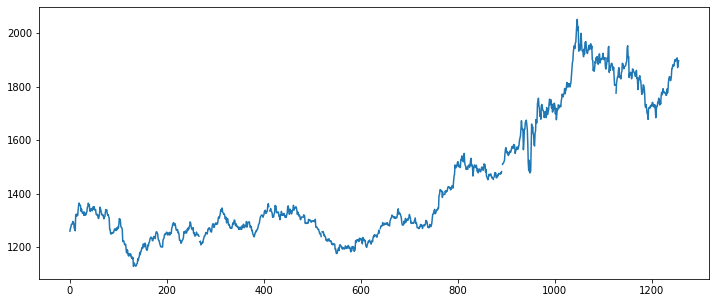

In [ ]:
df['Close'].plot(figsize=(12,5))

# Understanding Auto Regressive Integrated Moving Average (ARIMA)

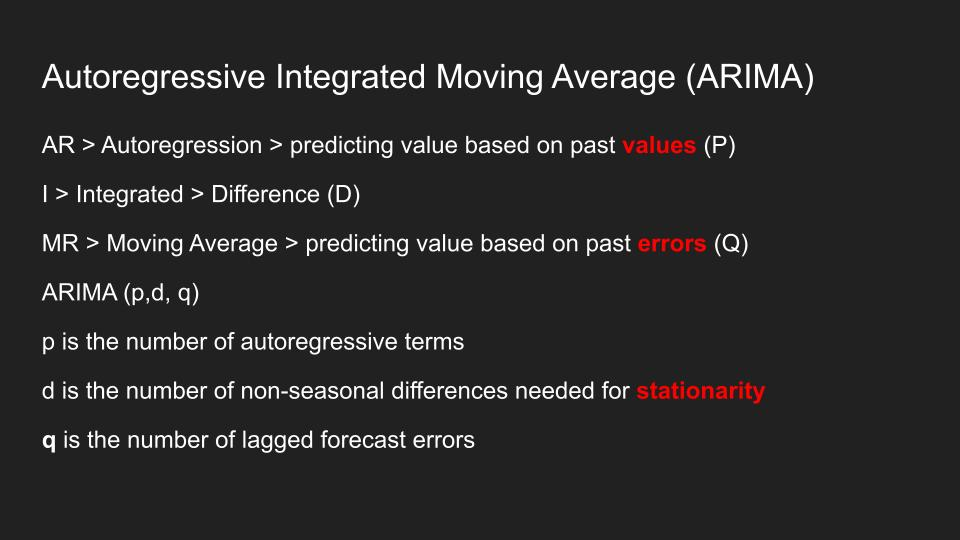

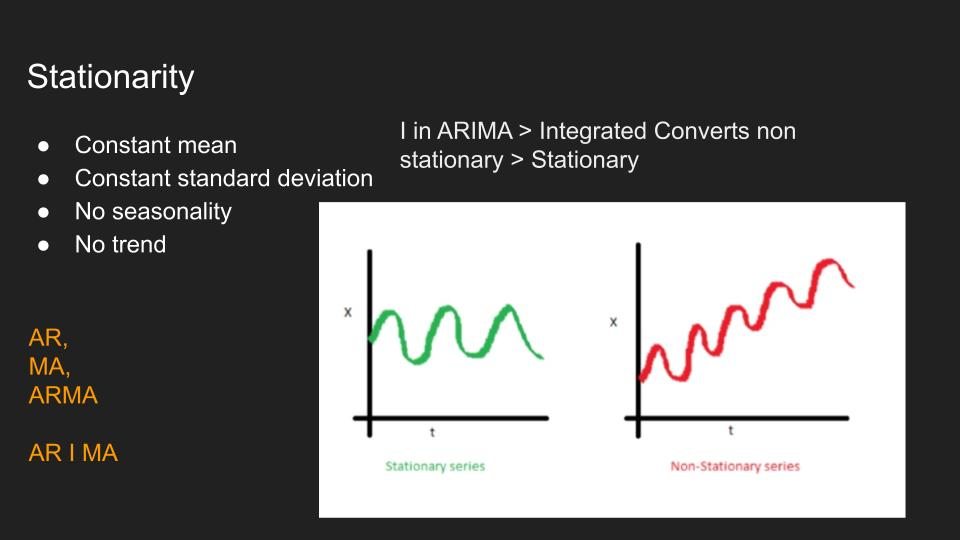

#Finding Order (P,D,Q)

In [ ]:
from pmdarima import auto_arima

In [ ]:
df = df.dropna()
best_order = auto_arima(df['Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10163.002, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10159.564, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10161.020, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10161.064, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10159.150, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10162.222, Time=0.96 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.758 seconds


## Data Preperation-Train Test Split

In [ ]:
columns = ['Close']
df = pd.DataFrame(df,columns=columns)

In [ ]:
df

,Close
0,1259.800049
1,1270.199951
2,1273.400024
3,1284.400024
4,1285.599976
...,...
1251,1902.900024
1252,1907.500000
1253,1871.199951
1254,1889.800049


In [ ]:
  train, test = df[0:int(len(df)*0.85)], df[int(len(df)*0.85):]

In [ ]:
train.shape,test.shape

((1058, 1), (187, 1))

In [ ]:
df.shape

(1245, 1)

## Creating ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(0,1,0))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1057
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4227.423
Method:                           css   S.D. of innovations             13.204
Date:                Thu, 19 Aug 2021   AIC                           8458.846
Time:                        07:08:05   BIC                           8468.773
Sample:                             1   HQIC                          8462.609
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6318      0.406      1.556      0.120      -0.164       1.428
==============================================================================
"""

## Forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


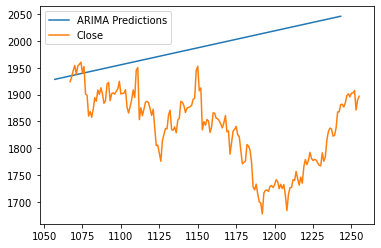

In [ ]:
start=len(train)               ##Example= y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima its 2 > data- 1 
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

### Error

In [ ]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

176.21154198083428


##More Forecast Graphs

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


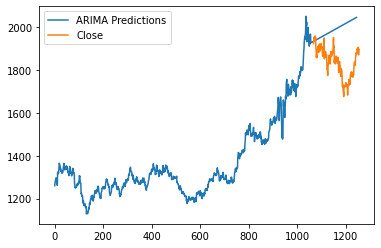

In [ ]:
start=1
end=1245
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


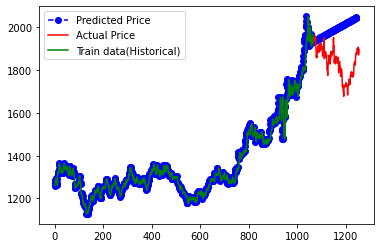

In [ ]:
start=1
end=1245
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



## 30 days into the future

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


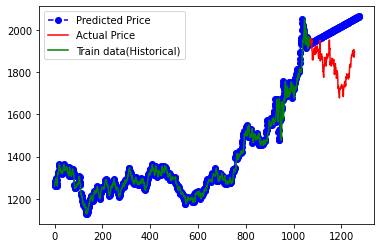

In [ ]:
### 30 days into the future

start=1
end=1275
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price')
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')

